<IPython.core.display.Javascript object>


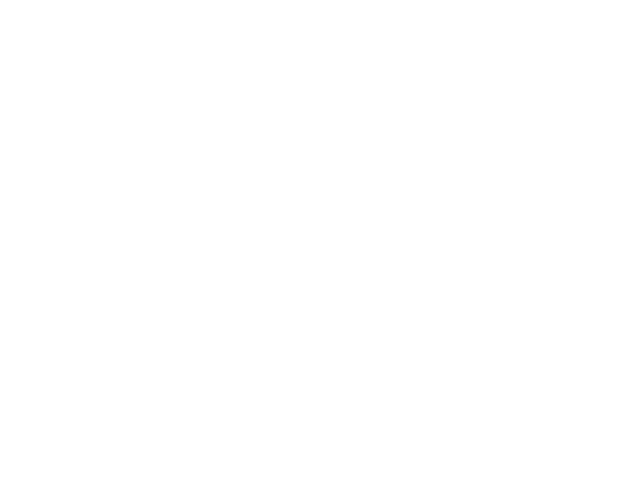

In [1]:
import subprocess
import tempfile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook


Ncases = 2 #Number of cases
labels = ['100-50','identical']
for i in range(Ncases):
    out = subprocess.run(['ngspice', '-b', f'Test{i+1}.cir'], 
    stdout=subprocess.PIPE,  stderr=subprocess.PIPE)
    #print(out)
    in_data = False
    count_dash_line = 0
    data = []
    for line in out.stdout.decode('ascii').split('\n'):
        if in_data:
            if line.strip() == '':
                break
            tmp = [float(x) for x in line.split()]
            data.append(tmp)

        if '----' in line:
            count_dash_line += 1
        if count_dash_line == 2 and not in_data:
            in_data = True

    #print(data)
    data =np.asarray(data)
    Icable = data[:,1]
    Vt =  data[:,2] + data[:,4]
    plt.loglog(Icable,Vt,label = labels[i])
plt.xlabel('Cable current (A)')
plt.ylabel('Voltage (V)')
plt.legend()

# Example of netlist in ngspice




In [2]:
''' 

* Netlist for 2 stacked tapes
I1 0 1 100
R1 1 2 0.5e-06
B1 2 0 V=100E-6*pow((I(B1)/100),30)
R2 1 3 0.5e-06
B2 3 0 V=100E-6*pow((I(B2)/50),30)
*.control
.dc I1 0 200 5
.print dc  V(1,2) V(1,3) V(2) V(3)  # In this part I select the traces to be printed in output
*.write output.txt V(1) V(2)
*.backanno
*.endc
.end

'''

' \n\n* Netlist for 2 stacked tapes\nI1 0 1 100\nR1 1 2 0.5e-06\nB1 2 0 V=100E-6*pow((I(B1)/100),30)\nR2 1 3 0.5e-06\nB2 3 0 V=100E-6*pow((I(B2)/50),30)\n*.control\n.dc I1 0 200 5\n.print dc  V(1,2) V(1,3) V(2) V(3)  # In this part I select the traces to be printed in output\n*.write output.txt V(1) V(2)\n*.backanno\n*.endc\n.end\n\n'

In [3]:
out = subprocess.run(['ngspice', '-b', 'Test1.cir'], 
stdout=subprocess.PIPE,  stderr=subprocess.PIPE) # This line runs ngspice on shell 
for line in out.stdout.decode('ascii').split('\n'):
    print(line) # printing the output


Circuit: * netlist for 2 stacked tapes

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 41
                         * netlist for 2 stacked tapes
                         DC transfer characteristic  Fri Aug  2 20:46:32  2019
--------------------------------------------------------------------------------
Index   i-sweep         v(1)-v(2)       v(1)-v(3)       v(2)            
--------------------------------------------------------------------------------
0	0.000000e+00	0.000000e+00	0.000000e+00	0.000000e+00	
1	5.000000e+00	1.250000e-06	1.250000e-06	0.000000e+00	
2	1.000000e+01	2.500000e-06	2.500000e-06	2.688821e-51	
3	1.500000e+01	3.750000e-06	3.750000e-06	1.490116e-42	
4	2.000000e+01	5.000000e-06	5.000000e-06	1.964403e-37	
5	2.500000e+01	6.250000e-06	6.250000e-06	8.500000e-34	
6	3.000000e+01	7.500000e-06	7.500000e-06	5.654555e-31	
7	3.500000e+01	8.750000e-06	8.750000e-06	1.150506e-28	
8	4.000000e+01	1.000000e-05	1.000000e-05	1.033345e-26	
9	4.500000e+01	

out = subprocess.run(['ngspice', '-b', 'Test1.cir'], 
stdout=subprocess.PIPE,  stderr=subprocess.PIPE)
print(out)
in_data = False
count_dash_line = 0
data = []
for line in out.stdout.decode('ascii').split('\n'):
    if in_data:
        if line.strip() == '':
            break
        tmp = [float(x) for x in line.split()]
        data.append(tmp)
        
    if '----' in line:
        count_dash_line += 1
    if count_dash_line == 2 and not in_data:
        in_data = True
        
print(data)
data =np.asarray(data)
plt.plot(data[:,1], data[:,2])
plt.plot(data[:,1], data[:,3])